In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('hourly_data.csv', index_col = ['date_time'], parse_dates = ['date_time'])

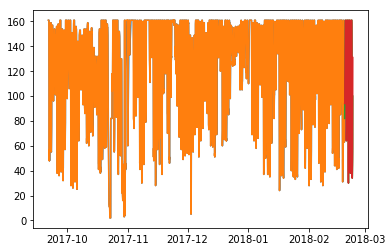

In [3]:
train = data[:-100]
test = data[-100:]
plt.plot(train)
plt.plot(test)
plt.show()

TypeError: float() argument must be a string or a number, not 'DecomposeResult'

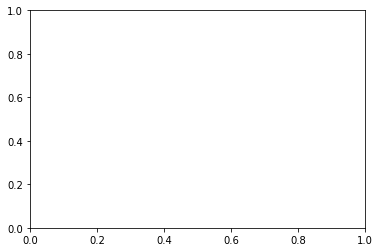

In [5]:
plt.plot(sm.tsa.seasonal_decompose(train, freq=24))
result = sm.tsa.stattools.adfuller(train)
plt.show()

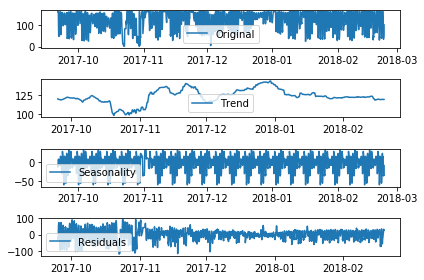

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_data = pd.read_csv('daily_data.csv', parse_dates = ['date_time'], index_col = ['date_time'])
hourly_data = pd.read_csv('hourly_data.csv', index_col = ['date_time'], parse_dates = ['date_time'])
#seasonility of a wee
X = hourly_data['X']
decomp = seasonal_decompose(X, freq= 168)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(X, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

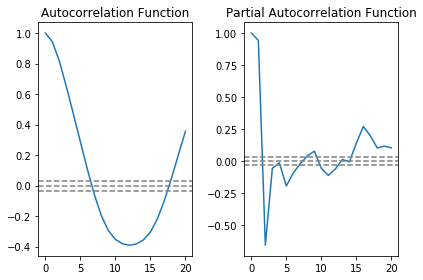

In [7]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(X, nlags=20)
lag_pacf = pacf(X, nlags=20, method='ols')

#plot ACF
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


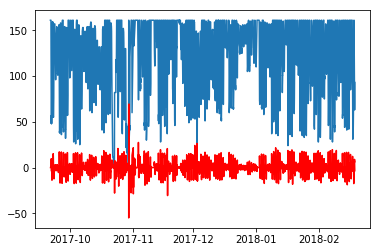

In [9]:
from statsmodels.tsa.arima_model import ARIMA
data_temp = X[:-100]
model = ARIMA(data_temp, order=(3,2,3))  #(p,d,q)
results_AR = model.fit()  
plt.plot(data_temp)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-hourly_data)**2))

In [ ]:
res = results_AR.fittedvalues.values
predicted_values = results_AR.forecast(1)
print(predicted_values[0])
data_temp1 = data['y']
y_act = data_temp[-100:]

predict = []
for i in range(100):
    model_new = ARIMA(data_temp[:-100+i], order=(3,2,3)).fit()
    predict_new = model_new.forecast(1)
    predict.append(predict_new[0][0])
plt.plot(predict)
plt.show()

[ 107.63570641]


/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site

/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site

/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site

/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site

/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site

/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site

/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site-packages/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/malay/anaconda3/lib/python3.6/site

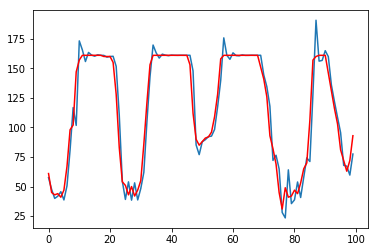

In [54]:
plt.plot(predict)
# print(y_act.values)
plt.plot(y_act.values, color='red')
plt.show()

In [55]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(predict, y_act.values))
print(rms)

12.42829403565952


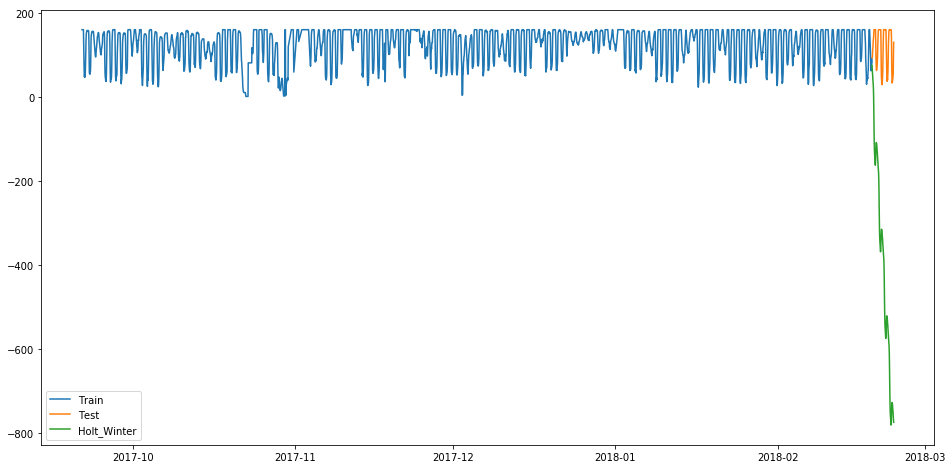

In [129]:
train = hourly_data[:-100]
test = hourly_data[-100:]
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['available_spots']) ,seasonal_periods=24 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['available_spots'], label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [121]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test, y_hat_avg.Holt_Winter))
print(rms)

567.262673527154


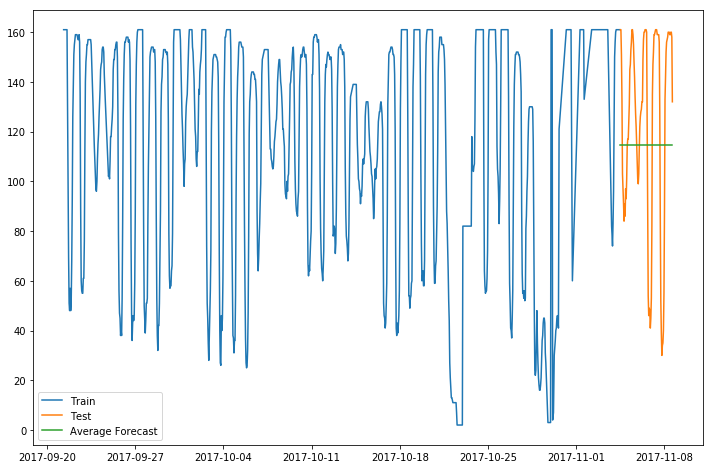

In [131]:
#normal avergae method
train = hourly_data[:1000]
test = hourly_data[1000:1100]
# print(hourly_data.head())
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['available_spots'].mean()
# print(y_hat_avg['avg_forecast'])
plt.figure(figsize=(12,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [133]:
rms = sqrt(mean_squared_error(test, y_hat_avg.avg_forecast))
print(rms)

40.739524346756916


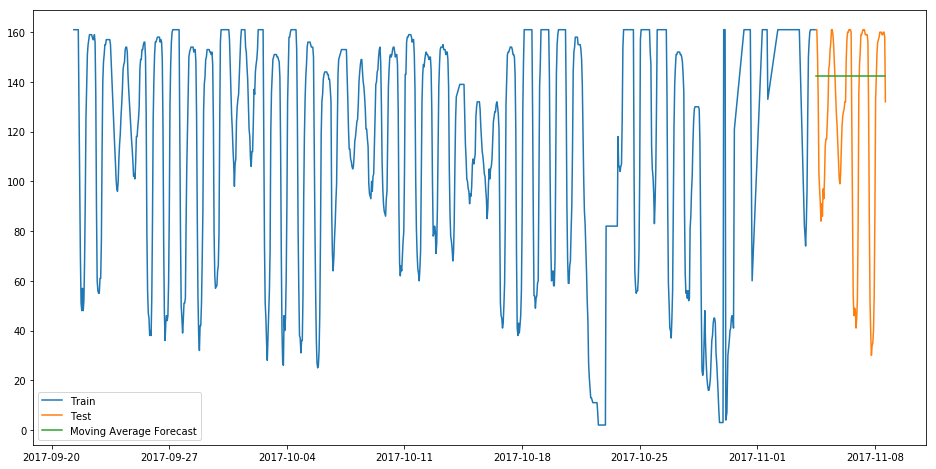

In [134]:
#moving average 
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['available_spots'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [136]:
rms = sqrt(mean_squared_error(test, y_hat_avg.moving_avg_forecast))
print(rms)

44.01847339470101
